In [1]:
import geopandas 
import geodatasets

c:\Users\Hasem\miniconda3\envs\geogee\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
nybb = geopandas.read_file(geodatasets.get_path("nybb"))
chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop"))

In [4]:
groceries = geopandas.read_file(geodatasets.get_path("geoda.groceries")).explode(ignore_index=True)
groceries

OBJECTID     Ycoord     Xcoord              Status  \
0          16  41.973266 -87.657073                OPEN   
1          18  41.696367 -87.681315                OPEN   
2          22  41.868634 -87.638638                OPEN   
3          23  41.877590 -87.654953                OPEN   
4          27  41.737696 -87.625795                OPEN   
..        ...        ...        ...                 ...   
143       585  41.880834 -87.647729   Chicago-West Loop   
144       586  41.920842 -87.669112         NewLocation   
145       587  41.835930 -87.664034  Chicago-Bridgeport   
146       588  41.859370 -87.630062  Chicago-South Loop   
147       600  41.696869 -87.599163        New Location   

                                          Address                   Chain  \
0            1051 W ARGYLE ST, CHICAGO, IL. 60640          VIET HOA PLAZA   
1    10800 S WESTERN AVE, CHICAGO, IL. 60643-3226       COUNTY FAIR FOODS   
2        1101 S CANAL ST, CHICAGO, IL. 60607-4932      WHOLE FOODS MARKET   
3    1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905            TARGET/SUPER   
4          112 W 87TH ST, CHICAGO, IL. 60620-1318             FOOD 4 LESS   
..                                            ...                     ...   
143            40 S Halsted St, Chicago, IL 60661               Mariano's   
144          2112 N Ashland Ave, Chicago IL 60614               Mariano's   
145         3145 S Ashland Ave, Chicago, IL 60608               Mariano's   
146            1615 S Clark St, Chicago, IL 60616               Mariano's   
147            10900 S Doty Ave, Chicago IL 60628  Pullman Walmart Center   

    Category                         geometry  
0       None  POINT (1168268.672 1933554.350)  
1       None  POINT (1162302.618 1832900.224)  
2       None  POINT (1173317.042 1895425.426)  
3        new  POINT (1168996.475 1898801.406)  
4       None  POINT (1176991.989 1847262.423)  
..       ...                              ...  
143     None  POINT (1171065.063 1899839.376)  
144     None  POINT (1165217.798 1914159.975)  
145     None  POINT (1166186.713 1883581.309)  
146     None  POINT (1175778.816 1892214.445)  
147     None  POINT (1185013.734 1832012.356)  

[148 rows x 8 columns]

<Axes: >

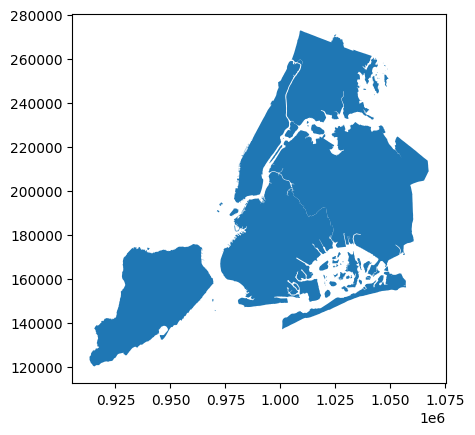

In [5]:
nybb.plot()

In [6]:
nybb.explore()

In [7]:
nybb.explore(
    column="BoroName",  # make choropleth based on "BoroName" column
    tooltip="BoroName",  # show "BoroName" value in tooltip (on hover)
    popup=True,  # show all values in popup (on click)
    tiles="CartoDB positron",  # use "CartoDB positron" tiles
    cmap="Set1",  # use "Set1" matplotlib colormap
    style_kwds=dict(color="black"),  # use black outline
)

In [8]:
import folium

m = chicago.explore(
    column="POP2010",  # make choropleth based on "POP2010" column
    scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
    legend=True,  # show legend
    k=10,  # use 10 bins
    tooltip=False,  # hide tooltip
    popup=["POP2010", "POP2000"],  # show popup (on-click)
    legend_kwds=dict(colorbar=False),  # do not use colorbar
    name="chicago",  # name of the layer in the map
)

groceries.explore(
    m=m,  # pass the map object
    color="red",  # use red color on all points
    marker_kwds=dict(radius=5, fill=True),  # make marker radius 10px with fill
    tooltip="Address",  # show "name" column in the tooltip
    tooltip_kwds=dict(labels=False),  # do not show column label in the tooltip
    name="groceries",  # name of the layer in the map
)

folium.TileLayer("CartoDB positron", show=False).add_to(
    m
)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

m  # show map

c:\Users\Hasem\miniconda3\envs\geogee\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
